<a href="https://colab.research.google.com/github/malek-hassen/backend/blob/main/ps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset_train=pd.read_csv('/content/KDDTrain+.csv')

In [ ]:
dataset_test=pd.read_csv('/content/KDDTest+.csv')

In [ ]:
dataset_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [ ]:
dataset_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,anomaly
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [ ]:
print("Shape of Training Dataset:", dataset_train.shape)
print("Shape of Testing Dataset:", dataset_test.shape)

Shape of Training Dataset: (125972, 42)
Shape of Testing Dataset: (22543, 42)


In [ ]:
# Assigning attribute name to dataset
dataset_train = pd.read_csv("/content/KDDTest+.csv", header=None, names = col_names)
dataset_test = pd.read_csv("/content/KDDTrain+.csv", header=None, names = col_names)

In [ ]:
#label distribution of Training set and testing set
print('Label distribution Training set:')
print(dataset_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['label'].value_counts())

Label distribution Training set:
label
anomaly    12833
normal      9711
Name: count, dtype: int64

Label distribution Test set:
label
normal     67343
anomaly    58630
Name: count, dtype: int64


In [ ]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object' :
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 2 categories

Distribution of categories in service:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 2 categories


In [ ]:
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [ ]:
dataset_train_categorical_values.head()


,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [ ]:
# protocol type
unique_protocol=sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(dataset_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [ ]:
#Transform categorical features into numbers using LabelEncoder()
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
# test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [ ]:
#One-Hot-Encoding¶
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testdumcols)

In [ ]:
dataset_train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trainservice=dataset_train['service'].tolist()
testservice= dataset_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference


[]

In [ ]:

for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(125973, 84)

In [ ]:
#Join encoded categorical dataframe with the non-categorical dataframe
newdf=dataset_train.join(dataset_train_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=dataset_test.join(dataset_test_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(22544, 117)
(125973, 123)


In [ ]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    anomaly
1    anomaly
2          0
3    anomaly
4    anomaly
Name: label, dtype: object


In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (22544, 117)
Dimensions of Probe: (22544, 117)
Dimensions of R2L: (22544, 117)
Dimensions of U2R: (22544, 117)
Test:
Dimensions of DoS: (125973, 123)
Dimensions of Probe: (125973, 123)
Dimensions of R2L: (125973, 123)
Dimensions of U2R: (125973, 123)


In [ ]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label', axis=1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label', axis=1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label', axis=1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label', axis=1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label', axis=1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label', axis=1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',axis=1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',axis=1)
Y_U2R_test = U2R_df_test.label

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [ ]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

In [ ]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
Y_DoS = Y_DoS.astype(str)
np.seterr(divide='ignore', invalid='ignore');
encoder = LabelEncoder()
Y_DoS_encoded = encoder.fit_transform(Y_DoS)
selector=SelectPercentile(f_classif, percentile=10)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X_DoS_imputed = imputer.fit_transform(X_DoS)

# Now use the imputed data for feature selection
X_newDoS = selector.fit_transform(X_DoS_imputed,Y_DoS)

X_newDoS.shape

(22544, 12)

In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'service_http',
 'flag_REJ',
 'flag_SF']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Ensure Y_Probe is of type string before encoding
Y_Probe = Y_Probe.astype(str)

# Create a LabelEncoder instance
encoder = LabelEncoder()
# Fit the imputer on your data and transform it
X_DoS_imputed = imputer.fit_transform(X_DoS)

# Now use the imputed data for feature selection
X_newDoS = selector.fit_transform(X_DoS_imputed,Y_DoS)


# Fit the encoder to your target variable and transform it
Y_Probe_encoded = encoder.fit_transform(Y_Probe)
X_Probe_imputed = imputer.fit_transform(X_Probe)
X_newProbe = selector.fit_transform(X_Probe_imputed,Y_Probe)
X_newProbe.shape

(22544, 12)

In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'service_http',
 'flag_REJ',
 'flag_SF']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()
Y_R2L = Y_R2L.astype(str)
# Fit the encoder to your target variable and transform it
Y_R2L_encoded = encoder.fit_transform(Y_R2L)
X_R2L_imputed = imputer.fit_transform(X_R2L)
X_newR2L = selector.fit_transform(X_R2L_imputed,Y_R2L)
X_newR2L.shape

(22544, 12)

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'service_http',
 'flag_REJ',
 'flag_SF']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Assuming Y_U2R is a pandas Series or a numpy array
# Ensure Y_U2R is of type string before encoding
Y_U2R = Y_U2R.astype(str)

# Fit the encoder to your target variable and transform it
#Y_U2R_encoded = encoder.fit_transform(Y_U2R)
X_U2R_imputed = imputer.fit_transform(X_U2R)
X_newU2R = selector.fit_transform(X_U2R_imputed,Y_U2R)
X_newU2R.shape

(22544, 12)

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'service_http',
 'flag_REJ',
 'flag_SF']

In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'service_http', 'flag_REJ', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'service_http', 'flag_REJ', 'flag_SF']

Features selected for R2L: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'service_http', 'flag_REJ', 'flag_SF']

Features selected for U2R: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'service_http', 'flag_REJ', 'flag_SF']

In [ ]:
#2. Recursive Feature Elimination for feature ranking (Option 1: get importance from previous selected)¶

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
Y_DoS_encoded = encoder.fit_transform(Y_DoS)

# Now use the encoded target variable in your RFE fitting

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS_encoded)
#rfe.fit(X_newDoS, Y_DoS.astype('int'))
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'service_http'), (2, 'dst_host_srv_rerror_rate'), (3, 'flag_SF'), (4, 'dst_host_srv_count'), (5, 'dst_host_count'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_same_srv_rate'), (8, 'logged_in'), (9, 'same_srv_rate'), (10, 'rerror_rate'), (11, 'srv_rerror_rate'), (12, 'flag_REJ')]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
Y_Probe_encoded = encoder.fit_transform(Y_Probe)

# Now use the encoded target variable in your RFE fitting
rfe.fit(X_newProbe, Y_Probe_encoded)
#rfe.fit(X_newProbe, Y_Probe.astype(int))
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'service_http'), (2, 'dst_host_srv_rerror_rate'), (3, 'flag_SF'), (4, 'dst_host_srv_count'), (5, 'dst_host_count'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_same_srv_rate'), (8, 'logged_in'), (9, 'same_srv_rate'), (10, 'rerror_rate'), (11, 'srv_rerror_rate'), (12, 'flag_REJ')]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
Y_R2L_encoded = encoder.fit_transform(Y_R2L)

#rfe.fit(X_newR2L, Y_R2L.astype(int))
rfe.fit(X_newR2L, Y_R2L_encoded)
print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'service_http'), (2, 'dst_host_srv_rerror_rate'), (3, 'flag_SF'), (4, 'dst_host_srv_count'), (5, 'dst_host_count'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_same_srv_rate'), (8, 'logged_in'), (9, 'same_srv_rate'), (10, 'rerror_rate'), (11, 'srv_rerror_rate'), (12, 'flag_REJ')]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
Y_U2R_encoded = encoder.fit_transform(Y_U2R)

# Now use the encoded target variable in your RFE fitting
rfe.fit(X_newU2R, Y_U2R_encoded)
#rfe.fit(X_newU2R, Y_U2R.astype(int))

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'service_http'), (2, 'dst_host_srv_rerror_rate'), (3, 'flag_SF'), (4, 'dst_host_srv_count'), (5, 'dst_host_count'), (6, 'dst_host_rerror_rate'), (7, 'dst_host_same_srv_rate'), (8, 'logged_in'), (9, 'same_srv_rate'), (10, 'rerror_rate'), (11, 'srv_rerror_rate'), (12, 'flag_REJ')]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
clf = DecisionTreeClassifier(random_state=0)
encoder = LabelEncoder()
Y_DoS_encoded = encoder.fit_transform(Y_DoS)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS_encoded)
#rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_DoS, Y_Probe_encoded)
#rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [ ]:
rfe.fit(X_DoS,Y_R2L_encoded)
#rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_DoS,Y_U2R_encoded)
#rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'Protocol_type_udp', 'service_domain_u', 'service_ecr_i', 'service_http', 'service_smtp']

Features selected for Probe: ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'Protocol_type_udp', 'service_domain_u', 'service_ecr_i', 'service_http', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'Protocol_type_udp', 'service_domain_u', 'service_ecr_i', 'service_http', 'service_smtp']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'Protocol_type_udp', 'service_domain_u', 'service_ecr_i', 'service_http', 'service_smtp']

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(22544, 13)
(22544, 13)
(22544, 13)
(22544, 13)


In [ ]:
#Classifier is trained for all features and for reduced features, for later comparison.

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# all features

# Create a LabelEncoder object
le = LabelEncoder()
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
Y_DoS = le.fit_transform(Y_DoS)
Y_Probe = le.fit_transform(Y_Probe)
Y_R2L = le.fit_transform(Y_R2L)
Y_U2R = le.fit_transform(Y_U2R)

# Now you can fit the classifiers
clf_DoS.fit(X_DoS, Y_DoS)

clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

#clf_DoS.fit(X_DoS, Y_DoS.astype(int))
#clf_Probe.fit(X_Probe, Y_Probe.astype(int))
#clf_R2L.fit(X_R2L, Y_R2L.astype(int))
#clf_U2R.fit(X_U2R, Y_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

In [ ]:
#from google.colab import drive
#import joblib
#drive.mount('/content/drive')


In [ ]:
#joblib.dump(clf_DoS, '/content/drive/My Drive/clf_DoS_model.joblib')

In [ ]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

In [ ]:
#Using all Features for each category
#Confusion Matrices : DoS

In [ ]:
print(X_DoS.shape)  # Shape of training data
print(X_DoS_test.shape)  # Shape of test data

(22544, 116)
(125973, 122)


In [ ]:
# Select only the first 116 features from X_DoS_test
X_DoS_test_selected = X_DoS_test[:, :X_DoS.shape[1]]

# Now, use this selected test data for prediction
predictions_DoS = clf_DoS.predict(X_DoS_test_selected)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier and RFE
clf_DoS = DecisionTreeClassifier(random_state=0)
selector = RFE(clf_DoS, n_features_to_select=116)

# Fit the RFE on the training data
X_DoS_selected = selector.fit_transform(X_DoS, Y_DoS)



In [ ]:
import pandas as pd

# Assuming X_DoS and X_DoS_test are NumPy arrays
# Create feature names for training data
feature_names_train = [f'feature_{i}' for i in range(X_DoS.shape[1])]

# Create feature names for test data
feature_names_test = [f'feature_{i}' for i in range(X_DoS_test.shape[1])]


# Convert X_DoS and X_DoS_test to DataFrames with appropriate column names
X_DoS_df = pd.DataFrame(X_DoS, columns=feature_names_train)
X_DoS_test_df = pd.DataFrame(X_DoS_test, columns=feature_names_test)  # Use correct feature names for test data

# Now apply RFE on the DataFrame
selector = RFE(clf_DoS, n_features_to_select=116)
X_DoS_selected = selector.fit_transform(X_DoS_df, Y_DoS)

# Step 2: Align the columns in X_DoS_test_df with the selected features
selected_columns = X_DoS_df.columns[selector.support_]  # Get column names of selected features

# Select only the selected columns from test data,
# ensuring they are present in test data as well
X_DoS_test_selected = X_DoS_test_df[selected_columns.intersection(X_DoS_test_df.columns)]

# Check if the number of selected features is as expected
if X_DoS_test_selected.shape[1] != 116:
    # Handle the case where not all selected features are present in test data
    # This might involve imputing missing values or adjusting feature selection
    print("Warning: Number of selected features in test data is not 116. Consider handling missing features.")


# Step 3: Make predictions
clf_DoS.fit(X_DoS_selected, Y_DoS) # This line is added

# Step 4: Make predictions using the fitted classifier
predictions_DoS = clf_DoS.predict(X_DoS_test_selected)


# Print the predictions
print(predictions_DoS)

[0 1 0 ... 1 0 1]


In [ ]:
# Apply the classifier we trained to the test data (which it has never seen before)
#clf_DoS.predict(X_DoS_test)


In [ ]:
# Assuming X_DoS is a NumPy array, and you don't have the original DataFrame column names
# you can create generic feature names:
training_features = [f'feature_{i}' for i in range(X_DoS.shape[1])]  # Create generic feature names

# Then, select features from the test data (X_DoS_test) based on their index:
# This assumes X_DoS_test is also a NumPy array
X_DoS_test_selected = X_DoS_test[:, :X_DoS.shape[1]] # Select the first X_DoS.shape[1] columns

# Now you can use the selected features for prediction:
clf_DoS.predict(X_DoS_test_selected)
# Apply the classifier we trained to the test data (which it has never seen before)
#clf_DoS.predict(X_DoS_test)

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test_selected)[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test_selected)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,20637,46706
anomaly,44207,14423


In [ ]:
#Confusion Matrices : Probe

In [ ]:
#row 52

In [ ]:
X_Probe_test_selected = X_Probe_test[:, :116]
Y_Probe_pred=clf_Probe.predict(X_Probe_test_selected)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,20637,46706
anomaly,44207,14423


In [ ]:
#Confusion Matrices : R2L

In [ ]:
X_R2L_test_selected = X_R2L_test[:, :116]
Y_R2L_pred=clf_R2L.predict(X_R2L_test_selected)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,20637,46706
anomaly,44207,14423


In [ ]:
#Confusion Matrices : U2R

In [ ]:
X_U2R_test_selected = X_U2R_test[:, :116]
Y_U2R_pred=clf_U2R.predict(X_U2R_test_selected)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,20637,46706
anomaly,44207,14423


In [ ]:
#Cross Validation: Accuracy, Precision, Recall, F-measure¶

In [ ]:
#DoS

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Convert Y_DoS_test to numeric if it contains strings
# Assuming 'unknown' is a string label you want to convert
# Replace 'unknown' with the actual string label if different
if any(isinstance(item, str) for item in Y_DoS_test):
    # Map string labels to numerical values
    label_mapping = {'unknown': -1, 'anomaly': 1}  # Assign -1 or any other suitable value to 'unknown'
    # Add mappings for other string labels as needed
    Y_DoS_test = pd.Series(Y_DoS_test).map(label_mapping).fillna(Y_DoS_test).astype(int).values

    # Ensure the mapping covers all string labels in Y_DoS_test
    unique_labels = np.unique(Y_DoS_test)
    string_labels = [label for label in unique_labels if isinstance(label, str)]
    if string_labels:
        raise ValueError(f"Unmapped string labels found in Y_DoS_test: {string_labels}")


accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00066)
Precision: 0.99841 (+/- 0.00127)
Recall: 0.99829 (+/- 0.00115)
F-measure: 0.99835 (+/- 0.00071)


In [ ]:
#Probe

In [ ]:
if any(isinstance(item, str) for item in Y_Probe_test):
    # Map string labels to numerical values
    label_mapping = {'unknown': -1, 'normal': 0,  'anomaly': 1} # Assign -1 or any other suitable value to 'unknown'
    # Add mappings for other string labels as needed
    Y_Probe_test = pd.Series(Y_Probe_test).map(label_mapping).fillna(Y_Probe_test).astype(int).values

    # Ensure the mapping covers all string labels in Y_Probe_test
    unique_labels = np.unique(Y_Probe_test)
    string_labels = [label for label in unique_labels if isinstance(label, str)]
    if string_labels:
        raise ValueError(f"Unmapped string labels found in Y_Probe_test: {string_labels}")

accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00066)
Precision: 0.99846 (+/- 0.00067)
Recall: 0.99846 (+/- 0.00066)
F-measure: 0.99846 (+/- 0.00066)


In [ ]:
#R2L
if any(isinstance(item, str) for item in Y_R2L_test):
    # Map string labels to numerical values
    label_mapping = {'unknown': -1, 'anomaly': 1}  # Assign -1 or any other suitable value to 'unknown'
    # Add mappings for other string labels as needed
    Y_R2L_test = pd.Series(Y_R2L_test).map(label_mapping).fillna(Y_R2L_test).astype(int).values

    # Ensure the mapping covers all string labels in Y_R2L_test
    unique_labels = np.unique(Y_R2L_test)
    string_labels = [label for label in unique_labels if isinstance(label, str)]
    if string_labels:
        raise ValueError(f"Unmapped string labels found in Y_DoS_test: {string_labels}")
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00066)
Precision: 0.99846 (+/- 0.00067)
Recall: 0.99846 (+/- 0.00066)
F-measure: 0.99846 (+/- 0.00066)


In [ ]:
#U2R
if any(isinstance(item, str) for item in Y_U2R_test):
    # Map string labels to numerical values
    label_mapping = {'unknown': -1, 'anomaly': 1}  # Assign -1 or any other suitable value to 'unknown'
    # Add mappings for other string labels as needed
    Y_U2R_test = pd.Series(Y_U2R_test).map(label_mapping).fillna(Y_U2R_test).astype(int).values

    # Ensure the mapping covers all string labels in Y_U2R_test
    unique_labels = np.unique(Y_U2R_test)
    string_labels = [label for label in unique_labels if isinstance(label, str)]
    if string_labels:
        raise ValueError(f"Unmapped string labels found in Y_DoS_test: {string_labels}")
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00066)
Precision: 0.99846 (+/- 0.00067)
Recall: 0.99846 (+/- 0.00066)
F-measure: 0.99846 (+/- 0.00066)


In [ ]:
#RFECV for illustration

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Automatically created module for IPython interactive environment


In [ ]:
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV DoS')
plt.plot(range(1, len(rfecv_DoS.cv_results_['mean_test_score']) + 1), rfecv_DoS.cv_results_['mean_test_score'])
#plt.plot(range(1, len(rfecv_DoS.grid_scores_) + 1), rfecv_DoS.grid_scores_)
plt.show()

KeyboardInterrupt: 

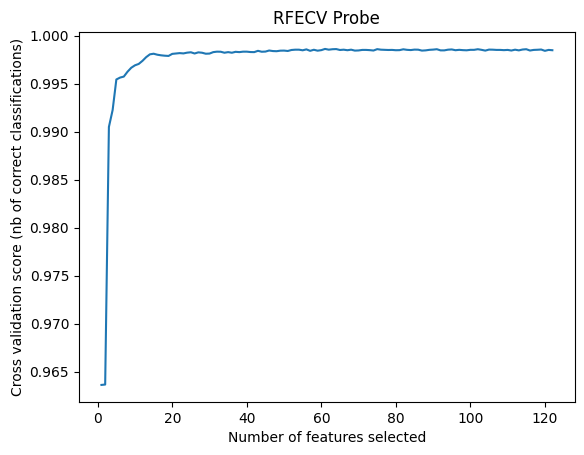

In [ ]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Probe')
plt.plot(range(1, len(rfecv_Probe.cv_results_['mean_test_score']) + 1), rfecv_Probe.cv_results_['mean_test_score'])
#plt.plot(range(1, len(rfecv_Probe.grid_scores_) + 1), rfecv_Probe.grid_scores_)
plt.show()

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

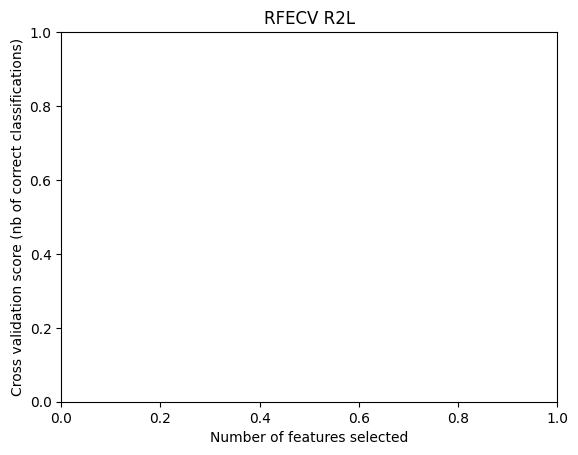

In [ ]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV R2L')
plt.plot(range(1, len(rfecv_R2L.grid_scores_) + 1), rfecv_R2L.grid_scores_)
plt.show()

In [ ]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV U2R')
plt.plot(range(1, len(rfecv_U2R.grid_scores_) + 1), rfecv_U2R.grid_scores_)
plt.show()

NameError: name 'RFECV' is not defined

In [ ]:
import numpy as np
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# Function to split data into clients
def split_data(X, Y, num_clients):
    X_clients = np.array_split(X, num_clients)
    Y_clients = np.array_split(Y, num_clients)
    return X_clients, Y_clients

# Function to simulate client-side updates
def client_update(model, X, Y, epochs=1):
    for _ in range(epochs):
        model.fit(X, Y)
    # Calculate training log loss
    preds_proba = model.predict_proba(X)
    loss = log_loss(Y, preds_proba)
    return loss

# Function to aggregate models (averaging decision tree depths)
def server_aggregate(global_model, client_models):
    global_params = global_model.get_params()
    avg_depth = np.mean([model.get_depth() for model in client_models])
    print(f"Average depth of client models: {avg_depth}")
    return avg_depth

# Function to test the global model
def test(global_model, X_test, Y_test):
    preds_proba = global_model.predict_proba(X_test)
    loss = log_loss(Y_test, preds_proba)
    predictions = np.argmax(preds_proba, axis=1)
    accuracy = accuracy_score(Y_test, predictions)
    return loss, accuracy

# Generate example data
np.random.seed(42)
num_clients = 5

# Simulated binary classification data
X = np.random.rand(100, 10)  # Features
Y = np.random.randint(0, 2, 100)  # Binary labels

# Test data
X_test = np.random.rand(20, 10)   # Test features
Y_test = np.random.randint(0, 2, 20)  # Test labels

# Split data among clients
X_clients, Y_clients = split_data(X, Y, num_clients)

# Initialize global model and client models
global_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
client_models = [DecisionTreeClassifier(max_depth=5, min_samples_split=10) for _ in range(num_clients)]

# Federated training
num_rounds = 5
epochs = 1

for r in range(num_rounds):
    print(f"\n{r}-th round")
    total_train_loss = 0

    # Train each client model locally
    for i in range(num_clients):
        loss = client_update(client_models[i], X_clients[i], Y_clients[i], epochs)
        total_train_loss += loss

    # Server aggregates models (example: averaging depths)
    avg_depth = server_aggregate(global_model, client_models)

    # Use one of the client models as the proxy global model
    global_model = copy.deepcopy(client_models[0])

    # Test the global model
    test_loss, test_acc = test(global_model, X_test, Y_test)

    # Print round statistics
    print(f"average train loss {total_train_loss / num_clients:.3f} | test loss {test_loss:.3f} | test acc: {test_acc:.3f}")



0-th round
Average depth of client models: 2.4
average train loss 0.250 | test loss 2.734 | test acc: 0.550

1-th round
Average depth of client models: 2.4
average train loss 0.241 | test loss 2.734 | test acc: 0.550

2-th round
Average depth of client models: 2.4
average train loss 0.241 | test loss 2.734 | test acc: 0.550

3-th round
Average depth of client models: 2.4
average train loss 0.241 | test loss 2.734 | test acc: 0.550

4-th round
Average depth of client models: 2.4
average train loss 0.241 | test loss 2.734 | test acc: 0.550


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name 'get_tags' from 'sklearn.utils._tags' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py)